# Mungbean methylation profiling project

In [5]:
#scaffold_100    2       +       0       2       CHH     CAT
#scaffold_100    8       +       10      10      CHH     CAA
#scaffold_100    14      +       0       52      CHH     CAC
#scaffold_100    16      +       7       56      CHH     CCA
#scaffold_100    17      +       7       64      CHH     CAC
#scaffold_100    19      +       12      68      CHH     CCA

In [1]:
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import bernoulli, poisson, binom
from scipy.stats import gaussian_kde
%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
def write_array2file(dic,Outfile_name): # array든 dict든..
    Outfile = open(Outfile_name,'wb')
    pickle.dump(dic, Outfile)
    Outfile.close()

def open_array(filename):
    pkl_file = open(filename, 'rb')
    mydict2 = pickle.load(pkl_file)
    pkl_file.close()
    return(mydict2)
def Fasta2dic(file_fasta):
        dic     = {}
        ofile   = open(file_fasta)
        bulk    = ofile.read()
        ofile.close()
        bulk_list = bulk.split('>')
        for each in bulk_list:
                if each == '':
                        continue
                strHD  = each.split('\n')[0].split()[0]
                strSeq = ''.join(each.split('\n')[1:])
                dic[strHD] = strSeq
        return(dic)
def head(data,num):
    i = 0 
    for each in data:
            print each
            if i == num:
                return()
            i += 1


In [3]:
file_fa = '/home/k821209/mungbean_methylation/sunhwa/gw/Vradi_ver6.fa'
dicHD2seq = Fasta2dic(file_fa)

**methylation pie chart**

The fraction of the methyl-cytosines for each sequence context.

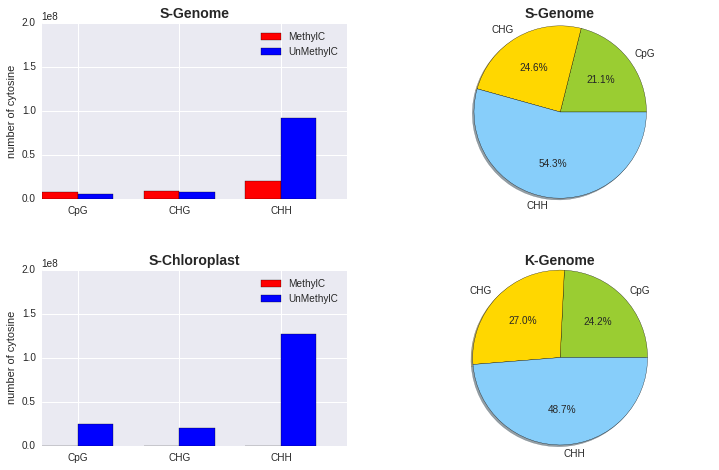

In [72]:
#/home/k821209/mungbean_methylation/sunhwa/S_1_4_5_1.fastq.gz_bismark_bt2_PE_report.txt
from matplotlib.gridspec import GridSpec
gs = GridSpec(3,2)
#labels = ['CpG', 'CHG', 'CHH', 'CN/CHN']
labels = ['CpG', 'CHG', 'CHH']

methylc_sunhwa = np.array([7804761, 9093042, 20106462]) # after pdf qv < 0.05
methylc_kyunggi = np.array([5924451,6612191,11916648]) # before binomial test
#unmethylc_sunhwa = np.array([92961756,146309079,1628774047,1055865]) # before binomial test
#unmethylc_sunhwa = np.array([4648741,7305309,70857661,1055865]) # before fdr pv < 0.001
unmethylc_sunhwa = np.array([5456665,8569864,91943365])
#unmethylc_kyunggi = np.array([51531259,80368953,902370054,1793849]) # before binomial test
methylc_sunhwa_chloro = np.array([76948,59426,57140])
unmethylc_sunhwa_chloro = np.array([24361518,20647334,127455973])

plt.figure(figsize=(12,12))

#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['yellowgreen', 'gold', 'lightskyblue']
#explode = (0, 0, 0, 0.2) # only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0)
plt.subplots_adjust(hspace = 0.4)

plt.subplot(gs[0,1])
plt.pie(methylc_sunhwa, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.title('S-Genome', fontsize=14, fontweight='bold')
plt.axis('equal')

plt.subplot(gs[1,1])
plt.pie(methylc_kyunggi, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.title('K-Genome', fontsize=14, fontweight='bold')
plt.axis('equal')


ax = plt.subplot(gs[0,0])
ind = np.arange(3)
width=0.35
bar1 = ax.bar(ind,methylc_sunhwa,width,color='r')
bar2 = ax.bar(ind+width,unmethylc_sunhwa,width,color='b')
ax.legend( (bar1[0], bar2[0]), ('MethylC', 'UnMethylC') )
plt.title('S-Genome', fontsize=14, fontweight='bold')
plt.ylabel('number of cytosine')
plt.ylim(0,2e8)
ax.set_xticks(ind+width)
ax.set_xticklabels(labels)
'''
ax = plt.subplot(gs[1,0])
ind = np.arange(4)
width=0.35
bar1 = ax.bar(ind,methylc_kyunggi,width,color='r')
bar2 = ax.bar(ind+width,unmethylc_kyunggi,width,color='b')
ax.legend( (bar1[0], bar2[0]), ('MethylC', 'UnMethylC') )
plt.title('K-Genome', fontsize=14, fontweight='bold')
plt.ylabel('number of cytosine')
plt.ylim(0,1e9)
ax.set_xticks(ind+width)
ax.set_xticklabels(labels)
'''
ax = plt.subplot(gs[1,0])
ind = np.arange(3)
width=0.35
bar1 = ax.bar(ind,methylc_sunhwa_chloro,width,color='r')
bar2 = ax.bar(ind+width,unmethylc_sunhwa_chloro,width,color='b')
ax.legend( (bar1[0], bar2[0]), ('MethylC', 'UnMethylC') )
plt.title('S-Chloroplast', fontsize=14, fontweight='bold')
plt.ylabel('number of cytosine')
plt.ylim(0,2e8)
ax.set_xticks(ind+width)
ax.set_xticklabels(labels)

plt.savefig("mungbean_methyl_sup_fig_1.png",dpi=300)

plt.show()

In [ ]:
labels = ['CG->CHG', 'CHG', 'CHH']

We calculated the binomial probability of false positive methylated call in the chloroplast genome of mungbean

In [4]:
file_chloro_methyl = '/home/k821209/mungbean_methylation/sunhwa_chloro/S_1_4_5_1.fastq.gz_bismark_bt2_pe.CX_report.txt'
M = 0
UM = 0
for line in open(file_chloro_methyl):
    cell = line.strip().split('\t')
    strM = cell[3]
    strUM = cell[4]
    M += int(strM)
    UM += int(strUM)
print float(M)/float(M+UM)
binomial_prob = float(M)/float(M+UM)

0.00111421384126


Identification of methylation sites: For each reference cytosine, WBSA uses the binomial distribution B(n, p) to identify the methylation site, using a 0.01 false discovery rate (FDR) corrected P-value [10], where the probability p in the binomial distribution B(n, p) is estimated from the number of cytosines sequenced in reference sequence cytosine positions in the unmethylated Lambda sequence (referred to as the error rate: non-conversion plus sequencing error frequency) if the Lambda sequence is uploaded by the user; otherwise, the probability p must be provided by the user. For each reference cytosine, the trial number (n) is the read depth, and the cytosine is noted as methylated if the number of sequenced cytosines (m) follows the following formula as below:
http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3907392/#pone.0086707-Lister1

Make array with the genomic position which have methyl cytosine 

이부분은 서버에서 돌리는걸로..

In [4]:
#244:/home/k821209/mungbean_methylation/sunhwa/_methylation_loc_ret.py
''' 
m_pos = np.array([],dtype=int)
for pos, met, unmet in data_vr07:
    dp = met+unmet
    pv = scipy.stats.binom_test(met,dp,binomial_prob)
    if pv < 0.05:
        np.append(m_pos,pos)

#rv = binom(dp, binomial_prob)
#minimum_number_of_Mreads = k[(rv.pmf(k)<0.05)][0]
#minimum_number_of_Mreads
#dp
'''
pass

총 시행에서 methylation call이 나올 확률이 0.001인 모델은 Unmethylated site 주사위(?) 라고 보면된다. 따라서 P-value가 작게 나오면 Unmethylated site주사위가 아닌 것으로 판단하기 때문에 Methylated site로 간주할 수 있다. 아래는 50번시행에서 2번의 Methylation이 나온 결과의 판단결과

In [9]:
if scipy.stats.binom_test(2,50,0.001) < 0.001:
    print scipy.stats.binom_test(3,50,0.001),'Methylated'
else:
    print scipy.stats.binom_test(3,50,0.001),'Unmethylated'

1.89216551401e-05 Unmethylated


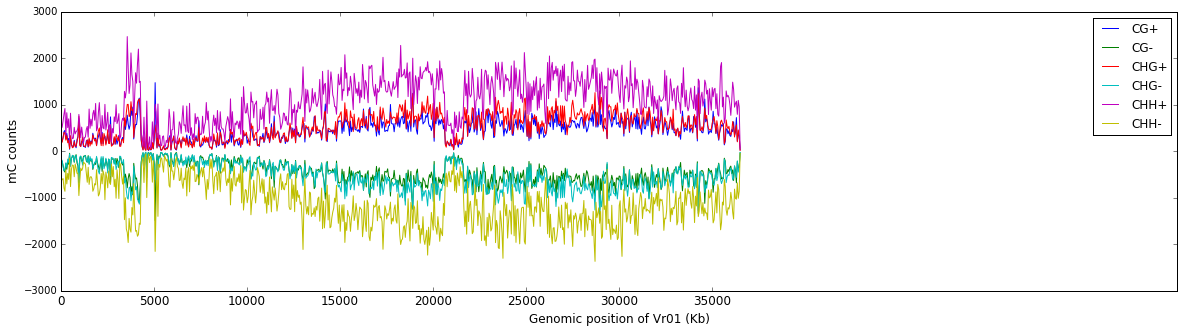

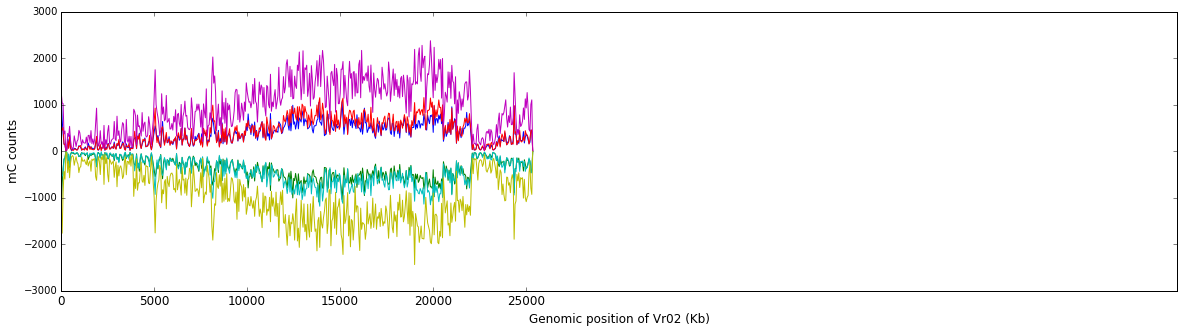

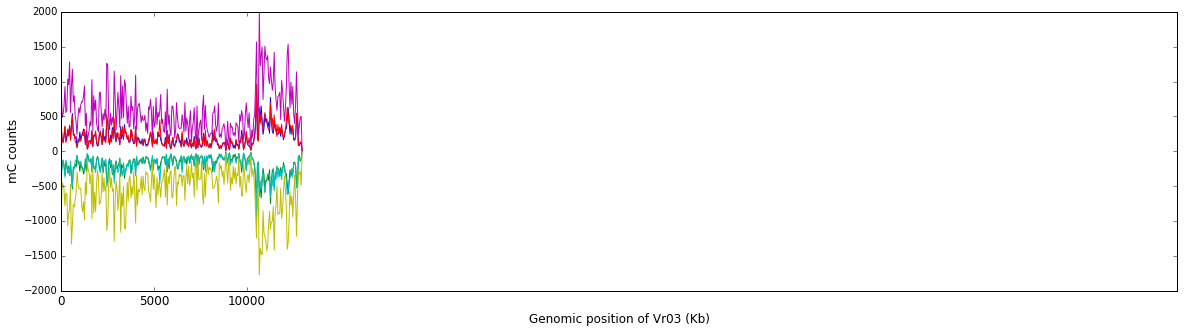

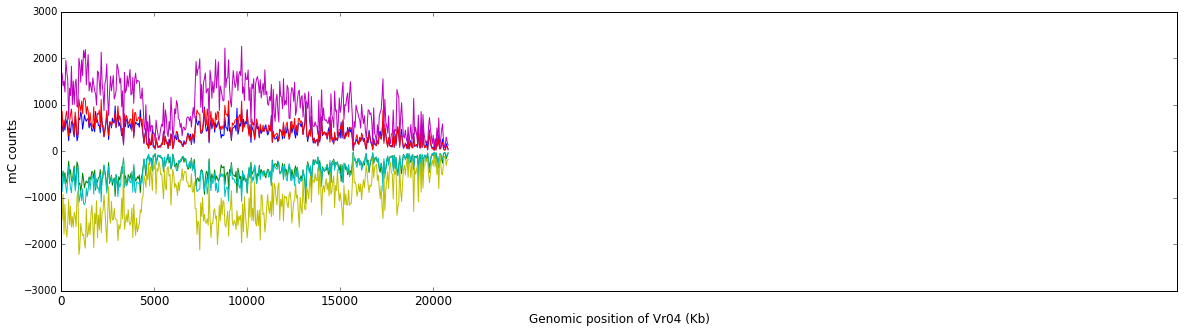

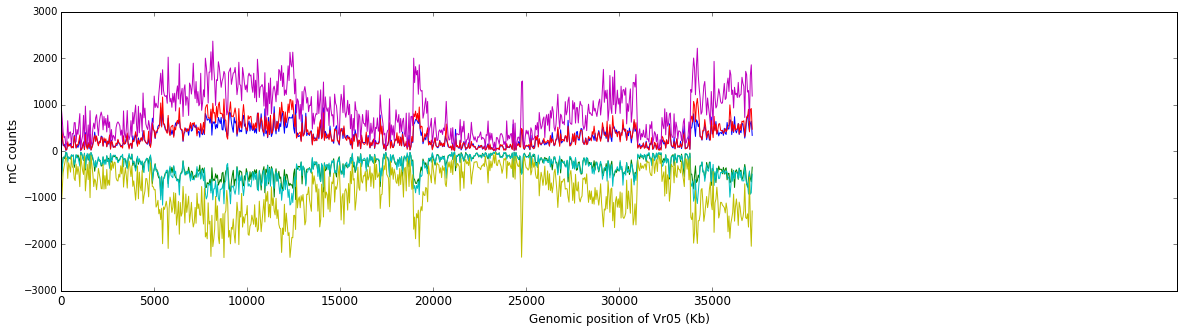

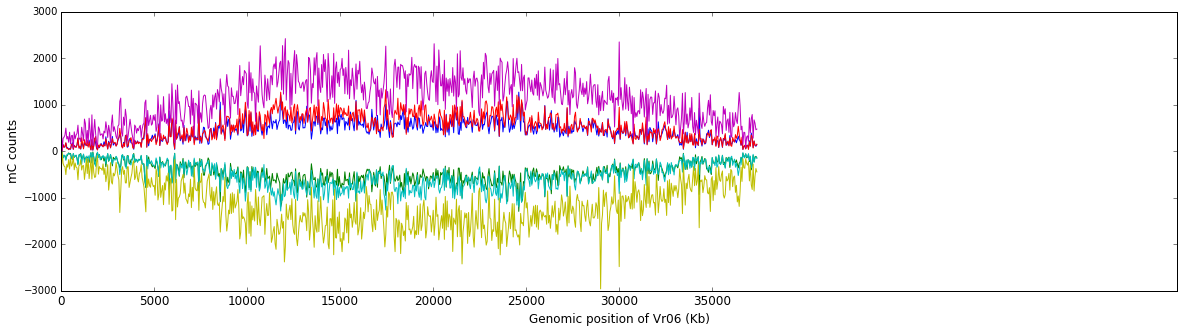

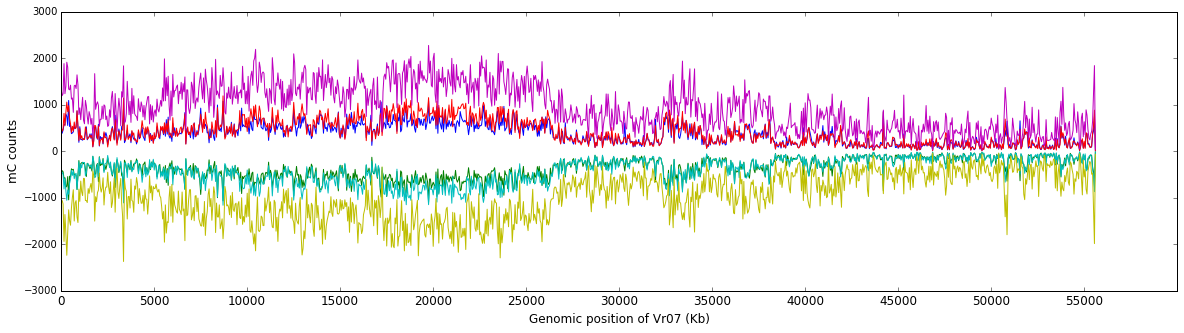

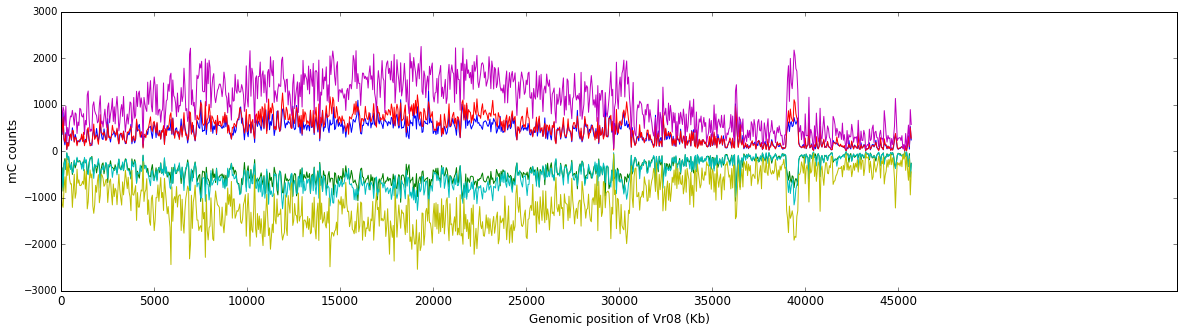

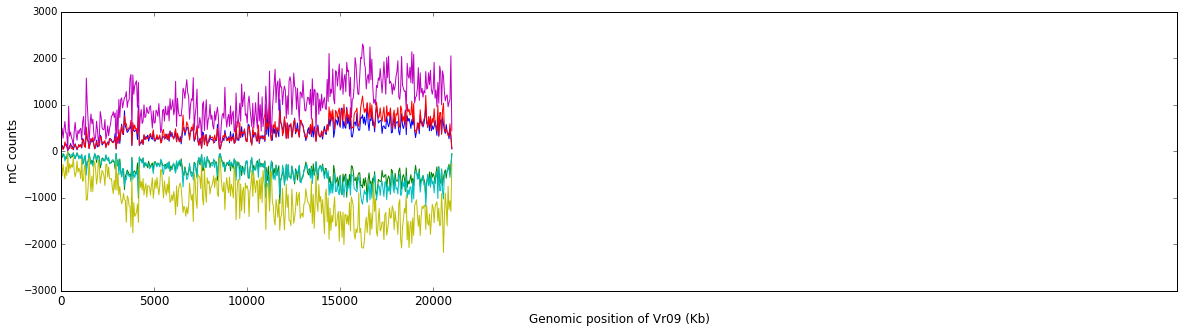

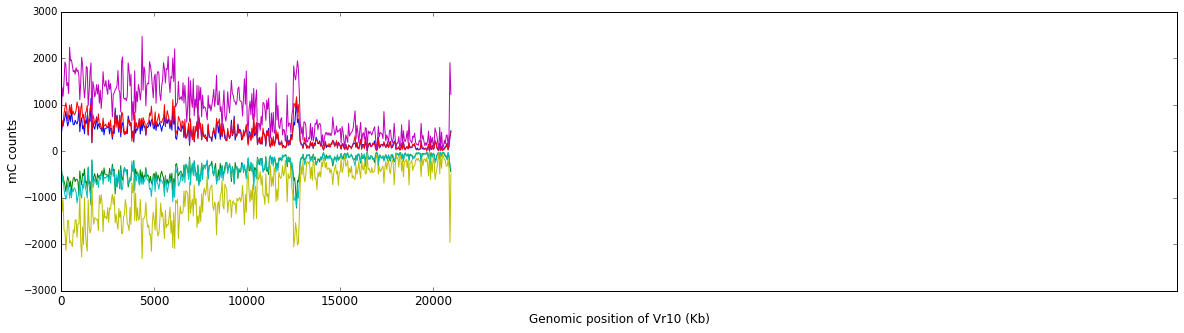

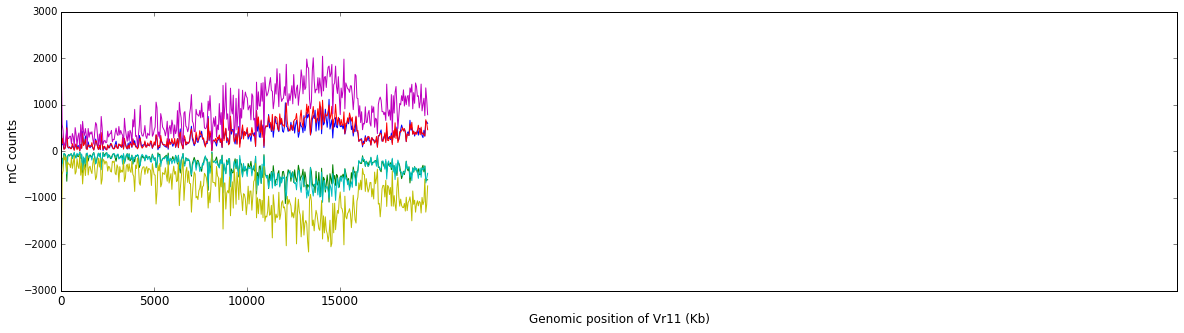

In [12]:

def methyl_hist(base,l,ch):
    
    file_CG_phist = base+'.CG.phist'
    file_CG_mhist = base+'.CG.mhist'
    data_CG_phist = np.loadtxt(file_CG_phist,usecols = (0,1))
    data_CG_mhist = np.loadtxt(file_CG_mhist,usecols = (0,1))

    file_CHG_phist = base+'.CHG.phist'
    file_CHG_mhist = base+'.CHG.mhist'
    data_CHG_phist = np.loadtxt(file_CHG_phist,usecols = (0,1))
    data_CHG_mhist = np.loadtxt(file_CHG_mhist,usecols = (0,1))

    file_CHH_phist = base+'.CHH.phist'
    file_CHH_mhist = base+'.CHH.mhist'
    data_CHH_phist = np.loadtxt(file_CHH_phist,usecols = (0,1))
    data_CHH_mhist = np.loadtxt(file_CHH_mhist,usecols = (0,1))

    x = data_CG_phist[:,0]
    y = data_CG_phist[:,1]
    plt.figure(figsize=(20,5))
    plt.xlim(0,1200)
    plt.plot(x,y,label='CG+')
    x = data_CG_mhist[:,0]
    y = data_CG_mhist[:,1]
    plt.plot(x,y,label='CG-')

    x = data_CHG_phist[:,0]
    y = data_CHG_phist[:,1]
    plt.plot(x,y,label='CHG+')
    x = data_CHG_mhist[:,0]
    y = data_CHG_mhist[:,1]
    plt.plot(x,y,label='CHG-')

    x = data_CHH_phist[:,0]
    y = data_CHH_phist[:,1]
    plt.plot(x,y,label='CHH+')
    x = data_CHH_mhist[:,0]
    y = data_CHH_mhist[:,1]
    plt.plot(x,y,label='CHH-')
    plt.xticks(x[x%100==0],map(int,x[x%100==0]*50) , size='large')
    if l == 1:
        '''
        for each_x in x:
            if each_x % 100 == 0:
                plt.annotate(int(each_x*50), xy=(each_x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='right')
        '''
        
        plt.legend()
        
    plt.xlabel("Genomic position of %s (Kb)"%ch, size='large')
    plt.ylabel("mC counts", size='large')
        #plt.savefig("mungbean_methyl_sup_fig_2.png",dpi=300)
    plt.show()
    
base = '/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr01.chr.qvsig.txt'
methyl_hist(base,1,'Vr01')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr02.chr.qvsig.txt',0,'Vr02')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr03.chr.qvsig.txt',0,'Vr03')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr04.chr.qvsig.txt',0,'Vr04')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr05.chr.qvsig.txt',0,'Vr05')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr06.chr.qvsig.txt',0,'Vr06')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr07.chr.qvsig.txt',0,'Vr07')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr08.chr.qvsig.txt',0,'Vr08')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr09.chr.qvsig.txt',0,'Vr09')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr10.chr.qvsig.txt',0,'Vr10')
methyl_hist('/home/k821209/mungbean_methylation/sunhwa/S_all.pv.txt.qv.Vr11.chr.qvsig.txt',0,'Vr11')


In [ ]:
data
plt.figure(figsize=(20,5))
plt.hist(data,bins=1000000)
plt.show()
#aa = np.argmax(density(xs))
#print 'Ks:',round(xs[aa],3),'density:',round(density(xs)[aa],3)
#max_x = xs[aa]
#max_y = density(xs)[aa]

#plt.plot(xs,density(xs))
#plt.annotate('Most recent duplication', xy=(max_x, max_y), xytext=(max_x+0.3, max_y+0.1),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )
#plt.ylabel('Density')
#plt.xlabel('Ks value')
#plt.savefig('out.png', dpi=96)


In [83]:
file_methyl = '/home/k821209/mungbean_methylation/kyunggi/K_1_2_4_1.fastq.gz_bismark_bt2_pe.CX_report.txt' #sys.argv[1] #S_1_4_5_1.fastq.gz_bismark_bt2_pe.CX_report.txt.sort
k = np.arange(0, 200)
total_ln = 116496691 #int(sys.argv[2]) #142974159
Probs = []
i = 0
dicP2C = {}
try:
        Probs_dist = open_array('/home/k821209/mungbean_methylation/kyunggi/Probs_dist.test.nparray')
        bnp = 1
except IOError:
        bnp = 0

if bnp == 0:
        for line in open(file_methyl):
                if i % 10000000 == 0:
                #if (float(i*100)/float(total_ln))%10 == 0:
                        print i, total_ln
                        print "total",(i*100/total_ln), "percent done"
                i += 1
                cell = line.strip().split('\t')
                strS = cell[0]
                strP = cell[1]
                strM = cell[3]
                strU = cell[4]
                strT = cell[5]
                site_depth = int(strM) + int(strUM)
                if int(strM) + int(strU) == 0:
                        continue
                fProb_M = round(float(strM) / (float(strM) + float(strU)),2)
                rv = binom(site_depth, binomial_prob)
                minimum_number_of_Mreads = k[(rv.pmf(k)<0.05)][0]
                if int(strM) >= minimum_number_of_Mreads:
                    print 'methylated',fProb_M,strM,strU,minimum_number_of_Mreads
                    time.sleep(1)
                else:
                    print 'unmethylated',fProb_M,strM,strU,minimum_number_of_Mreads
                    time.sleep(1)
                #methylation_call = # 1 or 0
                Probs.append(fProb_M)

        Probs_dist = np.array(Probs)
        write_array2file(Probs_dist, "/home/k821209/mungbean_methylation/kyunggi/Probs_dist.ver1.nparray")

0 116496691
total 0 percent done
methylated 0.75 3 1 1
unmethylated 0.0 0 4 1
unmethylated 0.0 0 6 1
unmethylated 0.0 0 7 1
methylated 0.29 2 5 1
unmethylated 0.0 0 1 1
methylated 1.0 1 0 1
methylated 0.71 5 2 1
methylated 0.71 5 2 1
unmethylated 0.0 0 7 1
unmethylated 0.0 0 2 1
methylated 1.0 2 0 1
methylated 0.56 5 4 1
unmethylated 0.0 0 10 1
unmethylated 0.0 0 10 1
methylated 0.2 2 8 1
unmethylated 0.0 0 3 1
unmethylated 0.0 0 3 1
methylated 0.09 1 10 1
methylated 0.09 1 10 1
methylated 0.09 1 10 1
unmethylated 0.0 0 11 1
unmethylated 0.0 0 11 1
methylated 0.64 7 4 1
unmethylated 0.0 0 11 1
unmethylated 0.0 0 11 1
methylated 0.09 1 10 1
unmethylated 0.0 0 11 1
unmethylated 0.0 0 4 1
unmethylated 0.0 0 4 1
methylated 0.06 1 15 1
unmethylated 0.0 0 8 1
methylated 0.13 1 7 1
methylated 0.21 4 15 1
methylated 0.42 8 11 1
unmethylated 0.0 0 19 1
methylated 0.11 1 8 1


KeyboardInterrupt: 

We caculated the probability distribution of methylation in each genome using the ratio of methylated reads counts for each site.

In [17]:
#Probs_dist = open_array('/data2/k821209/mungbean_methyl/ver6/Probs_dist.nparray') # 193 server
Probs_dist = open_array('/home/k821209/mungbean_methylation/sunhwa/Probs_dist.nparray')
Probs_dist2 = open_array('/home/k821209/mungbean_methylation/kyunggi/Probs_dist.nparray')

**Supplementary Figure 1.** Histogram of the ratio of methylated reads per site in the genome of Sunhwanogdu and Kyunggijaerae#5

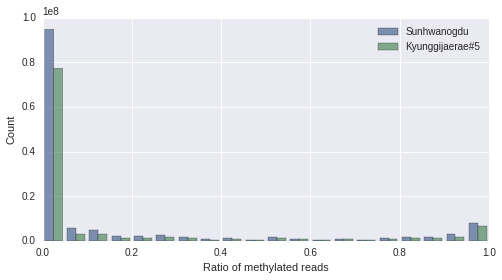

In [58]:
plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.xlabel('Ratio of methylated reads')
plt.ylabel('Count')

plt.hist((Probs_dist,Probs_dist2),alpha=0.8, bins=20,label=["Sunhwanogdu","Kyunggijaerae#5"])
plt.legend()
plt.savefig('methyl_plot1.png',dpi=300)
plt.show()

이 그래프는? 

In Sunhwanogdu genome, we found that ~ 5.6 percent of total cytocine contexts were methylated, which is consistent with the result of arabidopsis {ref}.

In [84]:
bProbs_dist = Probs_dist > 0.95
total_C_context = 142974159
print len(Probs_dist)
print np.count_nonzero(bProbs_dist)
print float(np.count_nonzero(bProbs_dist)) / float(total_C_context)

135994449
8018346
0.0560824841082


- 8018346 cytosine methylation observed based on 95% methylated reads threshold
- about 5.6 percent of cytosines in mungbean genome

In [ ]:
To determine the methylation state of each site we applied the binomial distribution of methyated

#genename, total C, total mC, weighted methylation level 